In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade pandas
!pip install --upgrade folium

In [1]:
import geopandas as gpd
import pandas as pd
import folium

import os
import zipfile
import shutil

# Leitura dos dados

https://downloads.ibge.gov.br/

https://cidades.ibge.gov.br/brasil/panorama

In [29]:
dir = '/content/drive/MyDrive/Programacao/GeoPandas/Dados/Dados_Modificados/'

rj = gpd.read_file(dir + 'RJ_Municipio/RJ_Municipio.shp')
imoveis = gpd.read_file(dir + 'Imoveis/Imoveis.shp')

Extrair os arquivos zip:

In [30]:
dir = '/content/drive/MyDrive/Programacao/GeoPandas/Dados/Censo/'

dir_temp = '/content/drive/MyDrive/Programacao/GeoPandas/Dados/Censo/Temporario/'
if not os.path.exists(dir_temp):
    os.makedirs(dir_temp)

filenames = []
for root, dirs, files in os.walk(dir):
    filenames.append(files)
    
filenames = filenames[0]

In [31]:
for item in filenames:
    zip_ref = zipfile.ZipFile(dir + item, 'r')
    zip_ref.extractall(dir + 'Temporario') # Extrai os arquivos na pasta temporario
    zip_ref.close()

# Concatenação dos geodataframes

In [32]:
dir_temp = '/content/drive/MyDrive/Programacao/GeoPandas/Dados/Censo/Temporario/'
lista_de_geodataframes = [gpd.read_file(dir_temp + item[:-4] + '_setor.shp') for item in filenames]

setor = pd.concat(lista_de_geodataframes, ignore_index=True)
setor.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry
0,400678,330455705080070,URBANO,330455705006,Rio Comprido,330455705,RIO DE JANEIRO,330455705,RIO COMPRIDO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.21461 -22.92207, -43.21475 -22.9..."
1,400679,330455705080071,URBANO,330455705006,Rio Comprido,330455705,RIO DE JANEIRO,330455705,RIO COMPRIDO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.21247 -22.92310, -43.21257 -22.9..."
2,400680,330455705080072,URBANO,330455705006,Rio Comprido,330455705,RIO DE JANEIRO,330455705,RIO COMPRIDO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.21270 -22.92297, -43.21257 -22.9..."
3,400681,330455705080073,URBANO,330455705006,Rio Comprido,330455705,RIO DE JANEIRO,330455705,RIO COMPRIDO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.21288 -22.92152, -43.21326 -22.9..."
4,400682,330455705080074,URBANO,330455705006,Rio Comprido,330455705,RIO DE JANEIRO,330455705,RIO COMPRIDO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.20969 -22.92335, -43.20980 -22.9..."


In [33]:
# Elimina o diretório temporário
shutil.rmtree(dir_temp)

Set do CRS:

In [34]:
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Plot dos setores

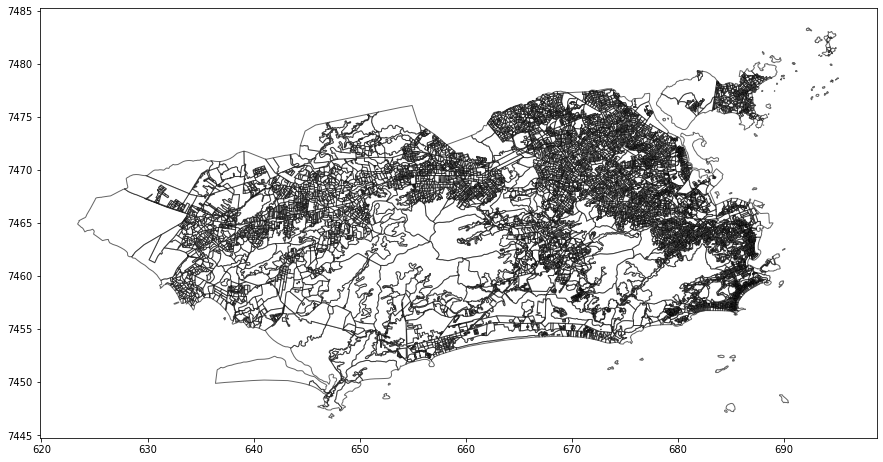

In [27]:
setor.plot(color='white', edgecolor='black', alpha=0.6, figsize=(15,15))

# Gravação do GeoDataFrame de Setores

In [24]:
dir = '/content/drive/MyDrive/Programacao/GeoPandas/Dados/Dados_Modificados'
if not os.path.exists(dir):
    os.makedirs(dir)

setor.to_file(dir + '/Setor_censitario')